# Runge phenomenon

Consider interpolating the following two functions on $[-1,1]$
$$
f_1(x) = \exp(-5x^2), \qquad f_2(x) = \frac{1}{1 + 16 x^2}
$$
We will try uniformly spaced points and Chebyshev points.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import exp,linspace,polyfit,polyval,cos,pi
from matplotlib.pyplot import figure,plot,legend,axis,text,subplot

Let us first plot the two functions.

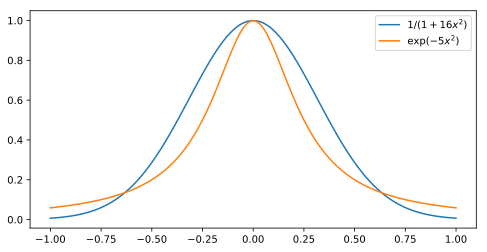

In [9]:
xmin, xmax = -1.0, +1.0

f1 = lambda x: exp(-5.0*x**2)
f2 = lambda x: 1.0/(1.0+16.0*x**2)

xx = linspace(xmin,xmax,100,True)
figure(figsize=(8,4))
plot(xx,f1(xx),xx,f2(xx))
legend(("$1/(1+16x^2)$", "$\exp(-5x^2)$"));

The two functions look qualitatively similar and both are infinitely differentiable.

In [10]:
def interp(f,points):
    xx = linspace(xmin,xmax,100,True);
    ye = f(xx);

    figure(figsize=(9,8))
    for i in range(1,7):
        N = 2*i
        subplot(3,2,i)
        if points == 'uniform':
            x = linspace(xmin,xmax,N+1,True)
        else:
            theta = linspace(0,pi,N+1, True)
            x = cos(theta)
        y = f(x);
        P = polyfit(x,y,N);
        yy = polyval(P,xx);
        plot(x,y,'o',xx,ye,'--',xx,yy)
        axis([xmin, xmax, -1.0, +1.1])
        text(-0.1,0.0,'N = '+str(N))

Interpolate $f_1(x)$ on uniformly spaced points.

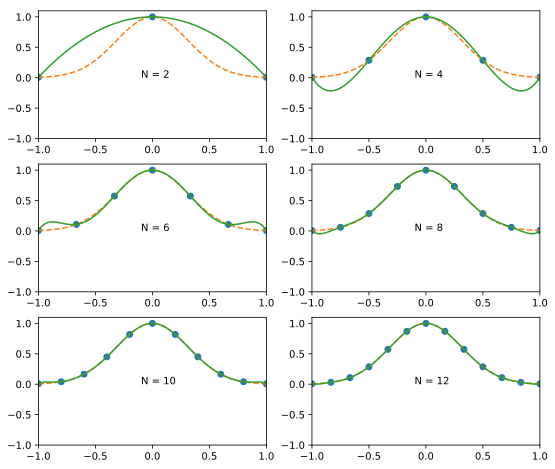

In [11]:
interp(f1,'uniform')

Interpolate $f_2(x)$ on uniformly spaced points.

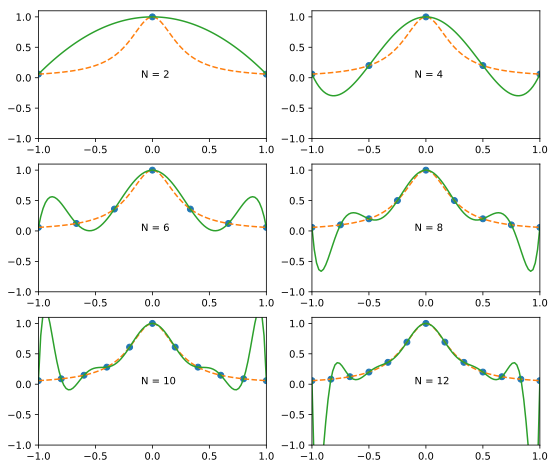

In [12]:
interp(f2,'uniform')

The above results are not good. Let us try $f_2(x)$ on Chebyshev points.

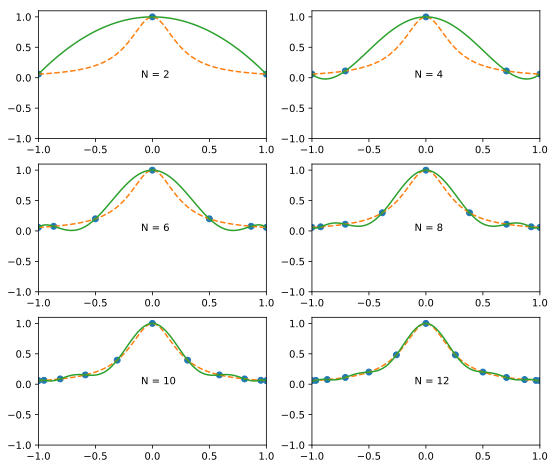

In [13]:
interp(f2,'chebyshev')

What about interpolating $f_1(x)$ on Chebyshev points ?

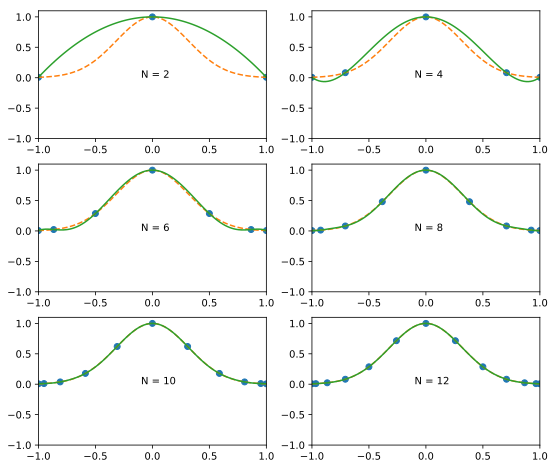

In [14]:
interp(f1,'chebyshev')

This also seems fine. So uniform points sometimes works, Chebyshev points work all the time.